### Creating Twitter Apps Account

### Connecting to the Twitter API

In [1]:
import oauth2 as oauth
import json

In [4]:
with open('config1.json') as file:
    tokens = json.loads(file.read())

# read the consumer keys and secret
consumer = oauth.Consumer(key=tokens['CONSUMER_KEYS'], secret = tokens['CONSUMER_SECRET'])

# read the tokens key and secret
token = oauth.Token(key = tokens['ACCESS_TOKEN'], secret = tokens['ACCESS_SECRET'])

# create a client object
client = oauth.Client(consumer, token)

client

### Getting data using the Twitter API

In [11]:
import json

In [19]:
FOLLOWERS_URL = 'https://api.twitter.com/1.1/followers/list.json'

#twitter handle
screen_name = 'realDonaldTrump'
url = FOLLOWERS_URL+'?screen_name='+screen_name

header, responce = client.request(url, method='GET')

In [20]:
print('status:', header['status'])

status: 200


In [22]:
print(responce[:600])

b'{"users":[{"id":1069596790234771456,"id_str":"1069596790234771456","name":"Muhammad Ahsan Hafeez \\ud83c\\uddf5\\ud83c\\uddf0","screen_name":"Muhamma90759912","location":"Uk \\ud83c\\uddec\\ud83c\\udde7  Peterborough","description":"Journalism Student \\ud83d\\udc68\\ud83c\\udffc\\u200d\\ud83c\\udf93 Coventry University \\u2764\\ufe0f Best university Ma Global journalisms \\ud83d\\udcd3 Sports Journalist \\ud83c\\udfcf #Cricket \\u2764\\ufe0f","url":null,"entities":{"description":{"urls":[]}},"protected":false,"followers_count":124,"friends_count":664,"listed_count":0,"created_at":"Mon Dec 03 14:18:41 +0000 2018","f'


### Working with retweets data

In [23]:
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

/Users/xiaxun/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/xiaxun/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/xiaxun/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [24]:
# create the retweets file object
edgelist_txt = 'retweets.txt'

G = nx.read_edgelist(edgelist_txt, create_using=nx.DiGraph())

/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


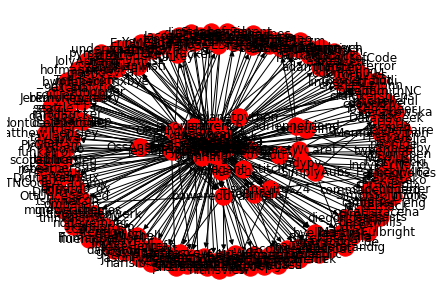

In [25]:
nx.draw(G, with_labels=True)

### NetworkX Layouts

In [26]:
LAYOUTS = {
    'circular': nx.circular_layout,
    'fr': nx.fruchterman_reingold_layout,
    'random': nx.random_layout,
    'shell': nx.shell_layout,
    'spectral': nx.spectral_layout,
    'spring': nx.spring_layout
}

In [27]:
def save_layout(G, layout_name):
    elarge = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] > 1.5]
    esmall = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <= 1.5]
    nlarge = [n for n in G.nodes() if n in ['PyTennessee']]
    pos = LAYOUTS[layout_name](G) # positions for all nodes
    
    print(nlarge)
    # nodes
    nx.draw_networkx_nodes(G, pos, nodelist=nlarge, node_size=1)
    
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='#cccccc')
    
    # labelsM
    labels = {}
    labels['PyTennessee'] = 'PyTennessee'
    nx.draw_networkx_labels(G, pos, labels, font_size=6)
    
    plt.axis('off')
    plt.figure(figsize=(20,10))
    plt.savefig(layout_name+'.png', dpi=500)

['PyTennessee']


/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


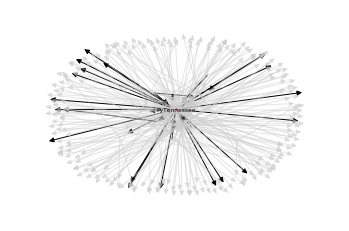

<Figure size 1440x720 with 0 Axes>

In [28]:
# print the spring layout
save_layout(G,'spring')

['PyTennessee']


/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


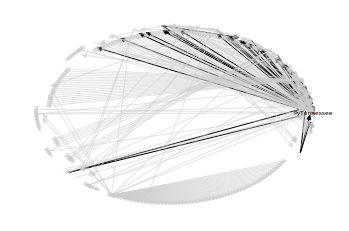

<Figure size 1440x720 with 0 Axes>

In [29]:
# print the shell layout
save_layout(G,'shell')

['PyTennessee']


/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


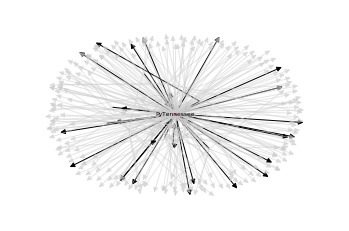

<Figure size 1440x720 with 0 Axes>

In [30]:
# print the fr layout
save_layout(G,'fr')

['PyTennessee']


/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


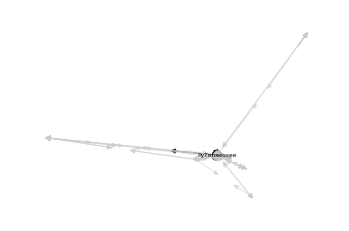

<Figure size 1440x720 with 0 Axes>

In [31]:
# print the spectral layout
save_layout(G,'spectral')

['PyTennessee']


/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


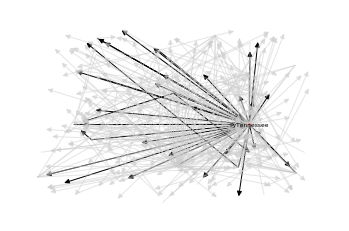

<Figure size 1440x720 with 0 Axes>

In [32]:
# print the random layout
save_layout(G,'random')

['PyTennessee']


/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


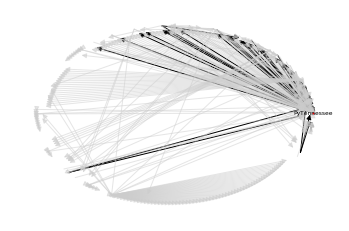

<Figure size 1440x720 with 0 Axes>

In [33]:
# print the circular layout
save_layout(G,'circular')

### Making networks with Twitter data

In [34]:
import json

In [35]:
# read the files from directory
file = open('list.PyTennessee.json')

# create an empty list
pairs = []

data = json.load(file)

for item in data['users']:
    pairs.append(('PyTennessee', str(item['screen_name'])))

In [36]:
pairs[:20]

[('PyTennessee', 'LampPostGroup'),
 ('PyTennessee', 'octovisinc'),
 ('PyTennessee', 'nashdevcal'),
 ('PyTennessee', 'hsvpy'),
 ('PyTennessee', 'bvalentine615'),
 ('PyTennessee', 'awebneck'),
 ('PyTennessee', 'ascot21'),
 ('PyTennessee', 'pyohio'),
 ('PyTennessee', 'CalEvans'),
 ('PyTennessee', 'nodevember'),
 ('PyTennessee', 'pythonanywhere'),
 ('PyTennessee', 'whitacre'),
 ('PyTennessee', 'adafruit'),
 ('PyTennessee', 'MosaikGlobal'),
 ('PyTennessee', 'nostarch'),
 ('PyTennessee', 'Spotify'),
 ('PyTennessee', 'newrelic'),
 ('PyTennessee', 'JuiceAnalytics'),
 ('PyTennessee', 'SimonSolutions'),
 ('PyTennessee', 'waypaverlabs')]

In [37]:
pairs[-20:] # the last 20

[('PyTennessee', 'CoderFaire'),
 ('PyTennessee', 'enthought'),
 ('PyTennessee', 'PyNashLadies'),
 ('PyTennessee', 'studionow'),
 ('PyTennessee', 'pycoders'),
 ('PyTennessee', 'coop_geo'),
 ('PyTennessee', 'gvanrossum'),
 ('PyTennessee', 'raymondh'),
 ('PyTennessee', 'geography76'),
 ('PyTennessee', 'pycon'),
 ('PyTennessee', 'mitsuhiko'),
 ('PyTennessee', 'MemphisPython'),
 ('PyTennessee', 'ThePSF'),
 ('PyTennessee', 'nashdevbot'),
 ('PyTennessee', 'planetpython'),
 ('PyTennessee', 'hacknashville'),
 ('PyTennessee', 'byeliad'),
 ('PyTennessee', 'egdelwonk'),
 ('PyTennessee', 'R_Macy'),
 ('PyTennessee', 'jasonamyers')]

### Graphing degree centrality

In [39]:
import operator
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


def centrality_sort(centrality_dict):
    return sorted(centrality_dict.items(),key=operator.itemgetter(1))

/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


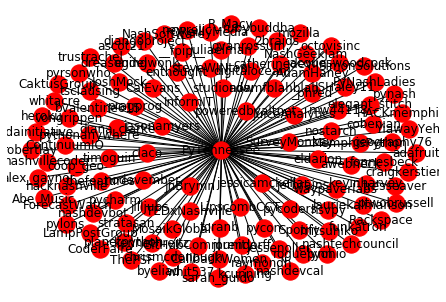

In [40]:
g = nx.Graph()
g.add_edges_from(pairs)

nx.draw(g, with_labels=True)

In [41]:
#how connected is the network?
print('very connected')

very connected


In [42]:
#centrality : which nodes have the highest /lowest degree centrality

degree_cent = nx.degree_centrality(g)
degree_sorted = centrality_sort(degree_cent)

print('----------------------Degree Centrality--------------------------')
print('Highest degree:',degree_sorted[-5:])
print('\n')

print('Lowest degree:',degree_sorted[:5])

----------------------Degree Centrality--------------------------
Highest degree: [('byeliad', 0.008620689655172414), ('egdelwonk', 0.008620689655172414), ('R_Macy', 0.008620689655172414), ('jasonamyers', 0.008620689655172414), ('PyTennessee', 1.0)]


Lowest degree: [('LampPostGroup', 0.008620689655172414), ('octovisinc', 0.008620689655172414), ('nashdevcal', 0.008620689655172414), ('hsvpy', 0.008620689655172414), ('bvalentine615', 0.008620689655172414)]


In [43]:
#betweenness centrality : which nodes have the highest /lowest betweenness centrality

between_cent = nx.betweenness_centrality(g)
between_sorted = centrality_sort(between_cent)

print('----------------------Betwenness Centrality--------------------------')
print('Highest degree:',between_sorted[-5:])
print('\n')

print('Lowest degree:',between_sorted[:5])

----------------------Betwenness Centrality--------------------------
Highest degree: [('byeliad', 0.0), ('egdelwonk', 0.0), ('R_Macy', 0.0), ('jasonamyers', 0.0), ('PyTennessee', 0.9999999999999999)]


Lowest degree: [('LampPostGroup', 0.0), ('octovisinc', 0.0), ('nashdevcal', 0.0), ('hsvpy', 0.0), ('bvalentine615', 0.0)]


In [44]:
#closenness centrality : which nodes have the highest and lowest closeness centrality

closeness_cent = nx.closeness_centrality(g)
closeness_sorted = centrality_sort(closeness_cent)

print('----------------------Closenness Centrality--------------------------')
print('Highest degree:',closeness_sorted[-5:])
print('\n')

print('Lowest degree:',closeness_sorted[:5])

----------------------Closenness Centrality--------------------------
Highest degree: [('byeliad', 0.5021645021645021), ('egdelwonk', 0.5021645021645021), ('R_Macy', 0.5021645021645021), ('jasonamyers', 0.5021645021645021), ('PyTennessee', 1.0)]


Lowest degree: [('LampPostGroup', 0.5021645021645021), ('octovisinc', 0.5021645021645021), ('nashdevcal', 0.5021645021645021), ('hsvpy', 0.5021645021645021), ('bvalentine615', 0.5021645021645021)]


In [46]:
highest_degree = [node[0] for node in degree_sorted[-20:]]

/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


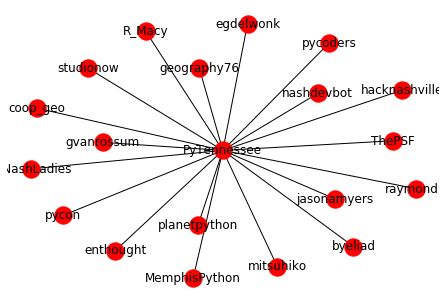

In [47]:
# create a subgraph
sub = g.subgraph(highest_degree)
nx.draw(sub, with_labels=True)
plt.show()

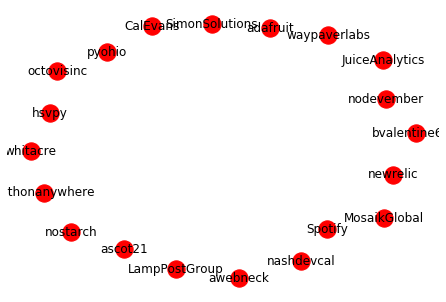

In [48]:
lowest_degree = [node[0] for node in degree_sorted[:20]]
sub_low = g.subgraph(lowest_degree)
nx.draw(sub_low, with_labels=True)

### Creating DiGraphs with twitter data

/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


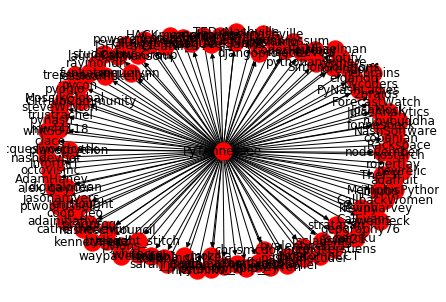

In [49]:
# create a digraph
d = nx.DiGraph()

d.add_edges_from(pairs)
nx.draw(d, with_labels=True)

In [50]:
# get the in_degree_centrality, and out_degree_centrality
in_degree_centrality = nx.in_degree_centrality(d)
in_degree_sorted = centrality_sort(in_degree_centrality)

print('---------------------- in degree Centrality--------------------------')
print('Highest degree:',in_degree_sorted[-5:])
print('\n')

print('Lowest degree:',in_degree_sorted[:5])


# out_degree centrality
out_degree_centrality = nx.out_degree_centrality(d)
out_degree_sorted = centrality_sort(out_degree_centrality)

print('---------------------- out degree Centrality--------------------------')
print('Highest degree:',out_degree_sorted[-5:])
print('\n')

print('Lowest degree:',out_degree_sorted[:5])

---------------------- in degree Centrality--------------------------
Highest degree: [('hacknashville', 0.008620689655172414), ('byeliad', 0.008620689655172414), ('egdelwonk', 0.008620689655172414), ('R_Macy', 0.008620689655172414), ('jasonamyers', 0.008620689655172414)]


Lowest degree: [('PyTennessee', 0.0), ('LampPostGroup', 0.008620689655172414), ('octovisinc', 0.008620689655172414), ('nashdevcal', 0.008620689655172414), ('hsvpy', 0.008620689655172414)]
---------------------- out degree Centrality--------------------------
Highest degree: [('byeliad', 0.0), ('egdelwonk', 0.0), ('R_Macy', 0.0), ('jasonamyers', 0.0), ('PyTennessee', 1.0)]


Lowest degree: [('LampPostGroup', 0.0), ('octovisinc', 0.0), ('nashdevcal', 0.0), ('hsvpy', 0.0), ('bvalentine615', 0.0)]


### Graphing in and out degree centalities

In [51]:
highest_in_degree = [node[0] for node in in_degree_sorted[-20:]]

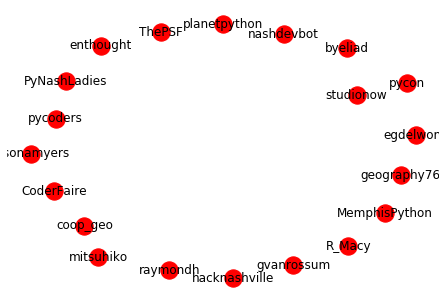

In [52]:
sub = g.subgraph(highest_in_degree)
nx.draw(sub, with_labels=True)

/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


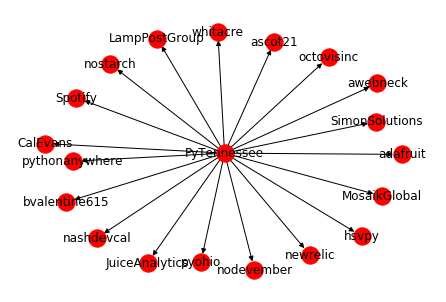

In [53]:
lowest_in_degree = [node[0] for node in in_degree_sorted[:20]]
sub1 = d.subgraph(lowest_in_degree)
nx.draw(sub1, with_labels=True)

In [55]:
highest_out_degree = [node[0] for node in out_degree_sorted[-20:]]
lowest_out_degree = [node[0] for node in out_degree_sorted[:20]]

/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/xiaxun/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


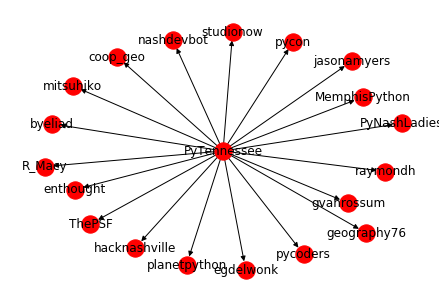

In [56]:
# plot highest out degree
sub = d.subgraph(highest_out_degree)
nx.draw(sub, with_labels=True)

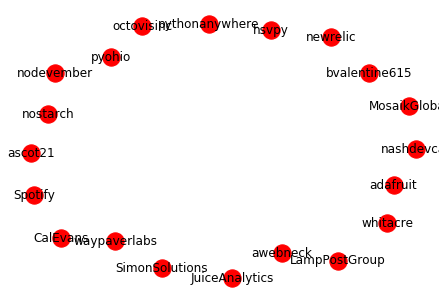

In [57]:
# plot lowest out degree
sub1 = d.subgraph(lowest_out_degree)
nx.draw(sub1, with_labels=True)